## Linear Regression with TensorFlow

This notebook will demonstrate how to create a simple linear regression model through a set of points.

We start by creating the data for the $x$ variable first:

In [126]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

# set randomness seed for results to be replicateable
seed = np.random.seed(0)

# N element vector with values between (0, 1)
N = 100
x = np.random.rand(N).astype(np.float32)

We will use the $$f(x)=3x+2$$ function where $y_i=f(x_{i})$

We will assign the $y$ variable to be the linear function of $3x+2$ and also add some __random noise__ from a standard Normal distribution:

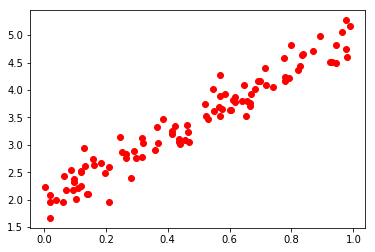

In [149]:
# noise from normal distribution
var = 0.25 # variance
eps = np.random.normal(loc=0, scale=var, size=N)

# generated actual data
y = 3 * x + 2 + eps

# Create a basic scatterplot
plt.plot(x, y, 'ro')
plt.show()

Having created our random dataset that is scattered along $3x+2$ we will attempt to optimize two parameters $W$ and $b$ with __TensorFlow__ to find the line of best fit. $$W*x+b$$ What we should get is $W=3$ and $b=2$ or values that are close to these.

In [150]:
# generic placeholder that will receive input data
x_ = tf.placeholder(tf.float32)

# randomly initialized parameters that need optimization
W = tf.Variable(tf.truncated_normal([1], stddev=0.125), name="Weight")
B = tf.Variable(tf.truncated_normal([1], stddev=0.125), name="Bias")

# predicted values from our model.
y_ = tf.add(tf.multiply(W, x_), B)

# loss value itself that needs reduction
loss = tf.reduce_mean(tf.square(y - y_))

# Create an optimizer and train it at a particular rate
learning_rate = 0.05
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

We have created an object __optimizer__ that will take the variable __loss__ and by figuring out a direction of steepest descent iteratively reduce the value to its global minimum, thus finding such values of $W$ & $b$ that bring variable __loss__ to the lowest possible value.

In [151]:
# Create a session and run the computational graph
with tf.Session() as sess:
    
    # initialize variables
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # define iterations
    epochs = 2000
    
    # create data dictionary 
    feed_dict = {x_: x}
    
    # create logs
    loss_log, w_log, b_log = [], [], []
    
    # iterate
    for epoch in range(epochs):
        
        # train the graph returning all values
        _, l, w, b = sess.run([train, loss, W, B], feed_dict)
        
        # every 100 steps
        if (epoch % 100) == 0:
            
            # keep log of values
            loss_log.append(l), w_log.append(w), b_log.append(b)
    
    # print results
    print("W =", sess.run(W), "b =", sess.run(B))

W = [ 2.99253702] b = [ 1.98384523]


In the above cell we created a computational graph and passed data to flow between computational nodes. At each iteration TensorFlow reduced __loss__ by finding more suitable values for $W$ and $b$.

We also created a log for each value of __loss__, $W$ and $b$ as TensorFlow was optimizing these parameters.

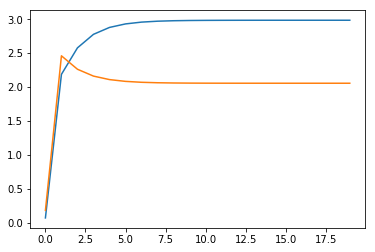

In [130]:
# plot values for W
plt.plot(w_log)

# plot values for b
plt.plot(b_log)

plt.show()

### Conclusion

From the final output we can see that values for $W$ and $b$ that TensorFlow found are very close to the actual. With increased iterations and more data (higher N) these values will get even closer.

Finally let's plot our points and the line with found parameters all on one graph.

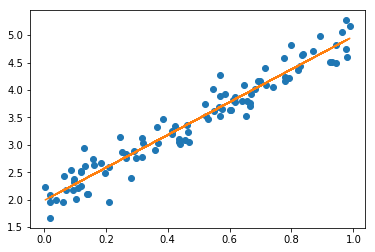

In [152]:
# plot the points again
plt.plot(x, y, 'o')

# assign the intercept & slope of the line 
intercept = b_log[len(b_log) - 1] # using last found value from the log
slope = w_log[len(w_log) - 1] # same here

# generate the points along the line
y_points = slope * x + intercept

# overlay the line on top of the points
plt.plot(x, y_points)
plt.show()